In [1]:
!pip install BeautifulSoup4

     |████████████████████████████████| 102kB 16.5MB/s ta 0:00:01


In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

#!conda install -c conda-forge geocoder --yes
#import geocoder

#!conda install -c conda-forge geopy --yes 
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
#from IPython.display import Image 
#from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


<h2>Loading data into dataframe</h2>

In [64]:
df = pd.read_csv("Crime_Toronto_Project.csv")
df.head(10)

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,...,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,...,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002
2,-79.425400,43.777592,2351,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1610,100,Robbery With Weapon,...,183.0,Wednesday,0,Robbery,D32,36,Newtonbrook West (36),43.777592,-79.425400,2003
3,-79.210373,43.801727,2352,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,2120,200,B&E,...,183.0,Wednesday,1,Break and Enter,D42,132,Malvern (132),43.801727,-79.210373,2004
4,-79.254334,43.835884,2354,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,1430,100,Assault,...,183.0,Wednesday,20,Assault,D42,130,Milliken (130),43.835884,-79.254334,2005
5,-79.273819,43.709972,2355,GO-20142524077,2014-07-18T00:01:00.000Z,2014-07-18T17:36:00.000Z,House,2120,200,B&E,...,199.0,Friday,0,Break and Enter,D41,120,Clairlea-Birchmount (120),43.709972,-79.273819,2006
6,-79.466019,43.709179,2356,GO-20142526048,2014-07-18T23:15:00.000Z,2014-07-18T23:15:00.000Z,House,1430,100,Assault,...,199.0,Friday,23,Assault,D13,31,Yorkdale-Glen Park (31),43.709179,-79.466019,2007
7,-79.386063,43.655243,2357,GO-20142528713,2014-07-19T01:30:00.000Z,2014-07-19T11:58:00.000Z,Outside,1610,100,Robbery With Weapon,...,200.0,Saturday,1,Robbery,D52,76,Bay Street Corridor (76),43.655243,-79.386063,2008
8,-79.237824,43.791515,2358,GO-20142531700,2014-07-19T15:00:00.000Z,2014-07-19T22:11:00.000Z,House,2120,220,B&E W'Intent,...,200.0,Saturday,15,Break and Enter,D42,132,Malvern (132),43.791515,-79.237824,2009
9,-79.435112,43.717243,2359,GO-20142536209,2014-07-20T01:30:00.000Z,2014-07-20T16:33:00.000Z,Other,2120,220,B&E W'Intent,...,201.0,Sunday,1,Break and Enter,D13,32,Englemount-Lawrence (32),43.717243,-79.435112,2010


In [67]:
#getting shape of loaded dataframe
df.shape

(167525, 29)

<h2>Extracting the columns needed</h2>

In [5]:
df2 = df[["reportedyear","premisetype","offence","MCI","Neighbourhood","Lat","Long"]]
#removing the number in brackets
df2["Neighbourhood"] = df2["Neighbourhood"].apply(lambda x: x.split('(')[0].strip())
df2.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,reportedyear,premisetype,offence,MCI,Neighbourhood,Lat,Long
0,2014,Apartment,Theft Over,Theft Over,Bay Street Corridor,43.659229,-79.385193
1,2014,Outside,Pointing A Firearm,Assault,Newtonbrook West,43.777592,-79.425400
2,2014,Outside,Robbery With Weapon,Robbery,Newtonbrook West,43.777592,-79.425400
3,2014,House,B&E,Break and Enter,Malvern,43.801727,-79.210373
4,2014,Commercial,Assault,Assault,Milliken,43.835884,-79.254334


<h2>Viewing distinct offences</h2>

In [6]:
#viewing distinct offences
df2["MCI"].value_counts()

Assault            90878
Break and Enter    34911
Auto Theft         18178
Robbery            18128
Theft Over          5430
Name: MCI, dtype: int64

In [7]:
#grouping offences by location and year
t = df2.groupby(['Neighbourhood', 'MCI', 'reportedyear']).size().reset_index()
t.head()

,Neighbourhood,MCI,reportedyear,0
0,Agincourt North,Assault,2014,72
1,Agincourt North,Assault,2015,81
2,Agincourt North,Assault,2016,82
3,Agincourt North,Assault,2017,69
4,Agincourt North,Assault,2018,88


In [8]:
#renaming columns and total of offences per location
t.columns = ['Neighbourhood', 'MCI', 'Year', 'Counts']
t.head()

,Neighbourhood,MCI,Year,Counts
0,Agincourt North,Assault,2014,72
1,Agincourt North,Assault,2015,81
2,Agincourt North,Assault,2016,82
3,Agincourt North,Assault,2017,69
4,Agincourt North,Assault,2018,88


In [9]:
Toronto_crimes = pd.pivot_table(t,values=['Neighbourhood'],
                               index=['Neighbourhood', 'Year'],
                               columns=['MCI'])
Toronto_crimes.head()

Counts                                              
MCI                  Assault Auto Theft Break and Enter Robbery Theft Over
Neighbourhood   Year                                                      
Agincourt North 2014    72.0       16.0            52.0    35.0        1.0
                2015    81.0       29.0            57.0    38.0        6.0
                2016    82.0       17.0            56.0    18.0        4.0
                2017    69.0       31.0            58.0    24.0       12.0
                2018    88.0       40.0            71.0    47.0        4.0

<h1>Exploratory analysis</h1>
<h2>Total crimes per Neighbourhood</h2>

In [10]:
Toronto_crimes['Total'] = Toronto_crimes.sum(axis=1)
Toronto_crimes.head(5)

Counts                                                \
MCI                  Assault Auto Theft Break and Enter Robbery Theft Over   
Neighbourhood   Year                                                         
Agincourt North 2014    72.0       16.0            52.0    35.0        1.0   
                2015    81.0       29.0            57.0    38.0        6.0   
                2016    82.0       17.0            56.0    18.0        4.0   
                2017    69.0       31.0            58.0    24.0       12.0   
                2018    88.0       40.0            71.0    47.0        4.0   

                      Total  
MCI                          
Neighbourhood   Year         
Agincourt North 2014  176.0  
                2015  211.0  
                2016  177.0  
                2017  194.0  
                2018  250.0

In [11]:
#Removing the multi index so that it will be easier to merge
Toronto_crimes.columns = Toronto_crimes.columns.map(''.join).str.replace("Counts","")
Toronto_crimes.head()

Assault  Auto Theft  Break and Enter  Robbery  \
Neighbourhood   Year                                                  
Agincourt North 2014     72.0        16.0             52.0     35.0   
                2015     81.0        29.0             57.0     38.0   
                2016     82.0        17.0             56.0     18.0   
                2017     69.0        31.0             58.0     24.0   
                2018     88.0        40.0             71.0     47.0   

                      Theft Over  Total  
Neighbourhood   Year                     
Agincourt North 2014         1.0  176.0  
                2015         6.0  211.0  
                2016         4.0  177.0  
                2017        12.0  194.0  
                2018         4.0  250.0

In [12]:
#grouping offences by location and year
totalC = df2.groupby(['Neighbourhood', 'MCI']).size().reset_index()
totalC.columns = ['Neighbourhood', 'MCI', 'Counts']
totalC.head()

,Neighbourhood,MCI,Counts
0,Agincourt North,Assault,392
1,Agincourt North,Auto Theft,133
2,Agincourt North,Break and Enter,294
3,Agincourt North,Robbery,162
4,Agincourt North,Theft Over,27


<h2>Total crimes per Neighbourhood for all years</h2>

In [13]:
Toronto_crimes_total = pd.pivot_table(totalC,values=['Neighbourhood'],
                               index=['Neighbourhood'],
                               columns=['MCI'])


Toronto_crimes_total['Total'] = Toronto_crimes_total.sum(axis=1)
Toronto_crimes_total.head(5)

Counts                                     \
MCI                          Assault Auto Theft Break and Enter Robbery   
Neighbourhood                                                             
Agincourt North                  392        133             294     162   
Agincourt South-Malvern West     580        159             381     148   
Alderwood                        182         84             124      36   
Annex                           1523        115             782     314   
Banbury-Don Mills                398         84             341      70   

                                        Total  
MCI                          Theft Over        
Neighbourhood                                  
Agincourt North                      27  1008  
Agincourt South-Malvern West         63  1331  
Alderwood                            34   460  
Annex                               174  2908  
Banbury-Don Mills                    45   938

In [14]:
#total crimes per location for all years
Toronto_crimes_total.columns = Toronto_crimes_total.columns.map(''.join).str.replace("Counts","")
Toronto_crimes_total.head()

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total
Neighbourhood,,,,,,
Agincourt North,392,133,294,162,27,1008
Agincourt South-Malvern West,580,159,381,148,63,1331
Alderwood,182,84,124,36,34,460
Annex,1523,115,782,314,174,2908
Banbury-Don Mills,398,84,341,70,45,938


In [15]:
Toronto_crimes.head(20)

Assault  Auto Theft  Break and Enter  \
Neighbourhood                Year                                         
Agincourt North              2014     72.0        16.0             52.0   
                             2015     81.0        29.0             57.0   
                             2016     82.0        17.0             56.0   
                             2017     69.0        31.0             58.0   
                             2018     88.0        40.0             71.0   
Agincourt South-Malvern West 2014    105.0        30.0             71.0   
                             2015    106.0        29.0             62.0   
                             2016    129.0        29.0             59.0   
                             2017    116.0        34.0             96.0   
                             2018    124.0        37.0             93.0   
Alderwood                    2014     45.0         9.0             23.0   
                             2015     47.0        19.0             27.0   
                             2016     39.0        17.0             26.0   
                             2017     21.0        14.0             23.0   
                             2018     30.0        25.0             25.0   
Annex                        2014    272.0        19.0            182.0   
                             2015    321.0        14.0            128.0   
                             2016    326.0        21.0            141.0   
                             2017    309.0        27.0            142.0   
                             2018    295.0        34.0            189.0   

                                   Robbery  Theft Over  Total  
Neighbourhood                Year                              
Agincourt North              2014     35.0         1.0  176.0  
                             2015     38.0         6.0  211.0  
                             2016     18.0         4.0  177.0  
                             2017     24.0        12.0  194.0  
                             2018     47.0         4.0  250.0  
Agincourt South-Malvern West 2014     25.0        19.0  250.0  
                             2015     27.0         9.0  233.0  
                             2016     34.0        12.0  263.0  
                             2017     32.0        14.0  292.0  
                             2018     30.0         9.0  293.0  
Alderwood                    2014      5.0         7.0   89.0  
                             2015      6.0         3.0  102.0  
                             2016     11.0        10.0  103.0  
                             2017      6.0         7.0   71.0  
                             2018      8.0         7.0   95.0  
Annex                        2014     56.0        30.0  559.0  
                             2015     62.0        28.0  553.0  
                             2016     62.0        27.0  577.0  
                             2017     80.0        36.0  594.0  
                             2018     54.0        53.0  625.0

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [17]:
hoods = np.array(Toronto_crimes_total.index)

In [18]:
#reset index
Toronto_crimes.reset_index(inplace = True)
Toronto_crimes

,Neighbourhood,Year,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total
0,Agincourt North,2014,72.0,16.0,52.0,35.0,1.0,176.0
1,Agincourt North,2015,81.0,29.0,57.0,38.0,6.0,211.0
2,Agincourt North,2016,82.0,17.0,56.0,18.0,4.0,177.0
3,Agincourt North,2017,69.0,31.0,58.0,24.0,12.0,194.0
4,Agincourt North,2018,88.0,40.0,71.0,47.0,4.0,250.0
...,...,...,...,...,...,...,...,...
700,Yorkdale-Glen Park,2014,106.0,63.0,51.0,23.0,24.0,267.0
701,Yorkdale-Glen Park,2015,136.0,53.0,57.0,21.0,14.0,281.0
702,Yorkdale-Glen Park,2016,174.0,41.0,66.0,24.0,26.0,331.0
703,Yorkdale-Glen Park,2017,161.0,52.0,58.0,34.0,23.0,328.0


<h1>Data Visualization</h1>
<h2>Line graph to view trend of crimes through the years in study</h2>

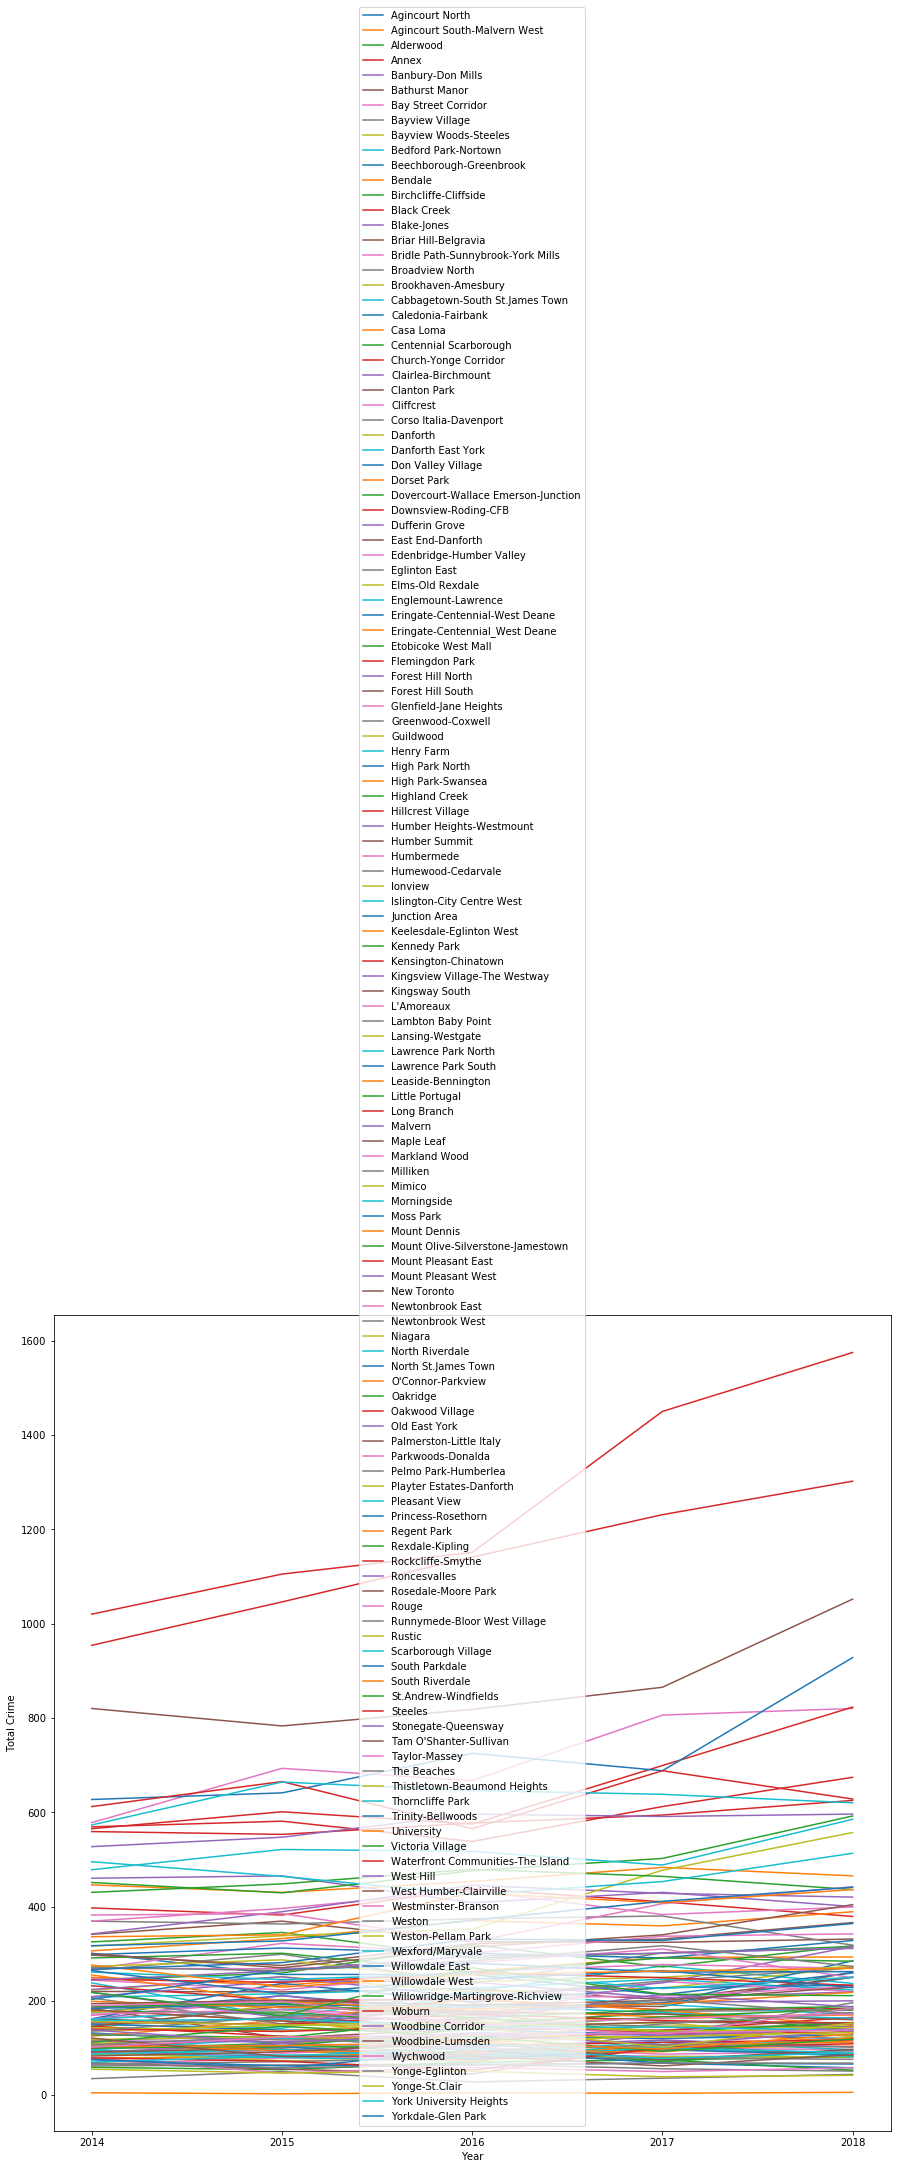

In [19]:
#draw line graph to see trend of safety issues in the different neighbourhoods
#graphs for all areas
fig,ax = plt.subplots()

for hood in hoods:
    #ax.plot(Toronto_crimes.index.get_level_values(1)[i],Toronto_crimes[Toronto_crimes.index.get_level_values(0)==hood].Total,label=hood)
    ax.plot(Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Year,Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Total,label=hood)
    ax.set_xticks(Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Year)

fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_xlabel("Year")
ax.set_ylabel("Total Crime")
ax.legend(loc='best')

In [20]:
Toronto_crimes_total.shape

(141, 6)

In [21]:
Toronto_crimes.shape

(705, 8)

<h2>Order by total crimes descending</h2>

In [24]:
Toronto_crimes_total_desc = Toronto_crimes_total.sort_values(by=["Total"], ascending = False)
Toronto_crimes_total_desc.reset_index(inplace = True)
Toronto_crimes_total_desc

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total
0,Church-Yonge Corridor,4061,200,946,904,190,6301
1,Waterfront Communities-The Island,3790,245,1074,323,242,5674
2,West Humber-Clairville,1375,1684,658,376,245,4338
3,Moss Park,2134,119,632,630,94,3609
4,Bay Street Corridor,2446,109,538,286,185,3564
...,...,...,...,...,...,...,...
136,Broadview North,180,20,70,24,5,299
137,Markland Wood,87,58,111,27,10,293
138,Yonge-St.Clair,113,17,81,8,15,234
139,Lambton Baby Point,98,34,46,10,5,193


<h2>Separating data into top 5, middle 5 and bottom 5 for closer study</h2>

In [25]:
#top 5 neighbourhoods with crime
Toronto_crimes_topFive = Toronto_crimes_total_desc.head(5)
Toronto_crimes_topFive = np.array(Toronto_crimes_topFive.Neighbourhood)
Toronto_crimes_topFive

array(['Church-Yonge Corridor', 'Waterfront Communities-The Island',
       'West Humber-Clairville', 'Moss Park', 'Bay Street Corridor'],
      dtype=object)

In [26]:
#bottom 5 neighbourhoods with crime
Toronto_crimes_bottomFive = Toronto_crimes_total_desc.tail(5)
Toronto_crimes_bottomFive = np.array(Toronto_crimes_bottomFive.Neighbourhood)
Toronto_crimes_bottomFive

array(['Broadview North', 'Markland Wood', 'Yonge-St.Clair',
       'Lambton Baby Point', 'Eringate-Centennial_West Deane'],
      dtype=object)

In [27]:
#mid 5 neighbourhoods with crime
Toronto_crimes_midFive = Toronto_crimes_total_desc[68:73]
Toronto_crimes_midFive = np.array(Toronto_crimes_midFive.Neighbourhood)
Toronto_crimes_midFive

array(['St.Andrew-Windfields', 'Greenwood-Coxwell', 'Englemount-Lawrence',
       'Morningside', 'Mount Dennis'], dtype=object)

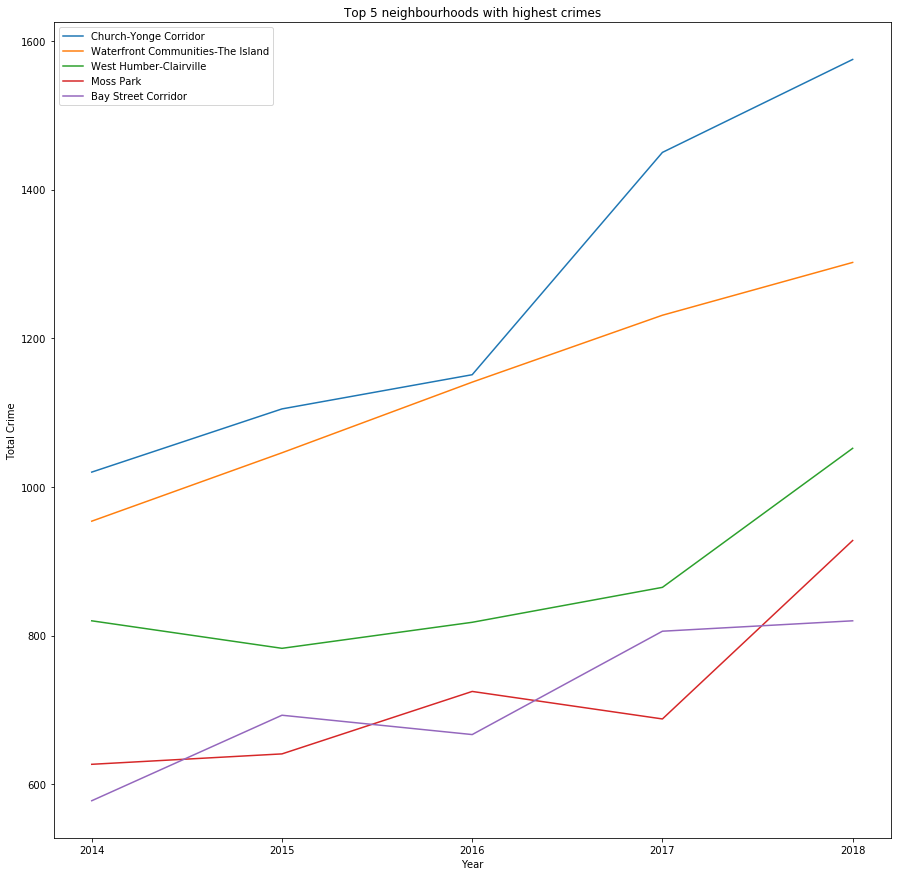

In [28]:
#draw line graph to see trend of safety issues in the different neighbourhoods
# crime trend in top 5 
fig,ax = plt.subplots()
for hood in Toronto_crimes_topFive:
    #ax.plot(Toronto_crimes.index.get_level_values(1)[i],Toronto_crimes[Toronto_crimes.index.get_level_values(0)==hood].Total,label=hood)
    ax.plot(Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Year,Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Total,label=hood)
    ax.set_xticks(Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Year)

fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_xlabel("Year")
ax.set_ylabel("Total Crime")
ax.set_title("Top 5 neighbourhoods with highest crimes")
ax.legend(loc='best')

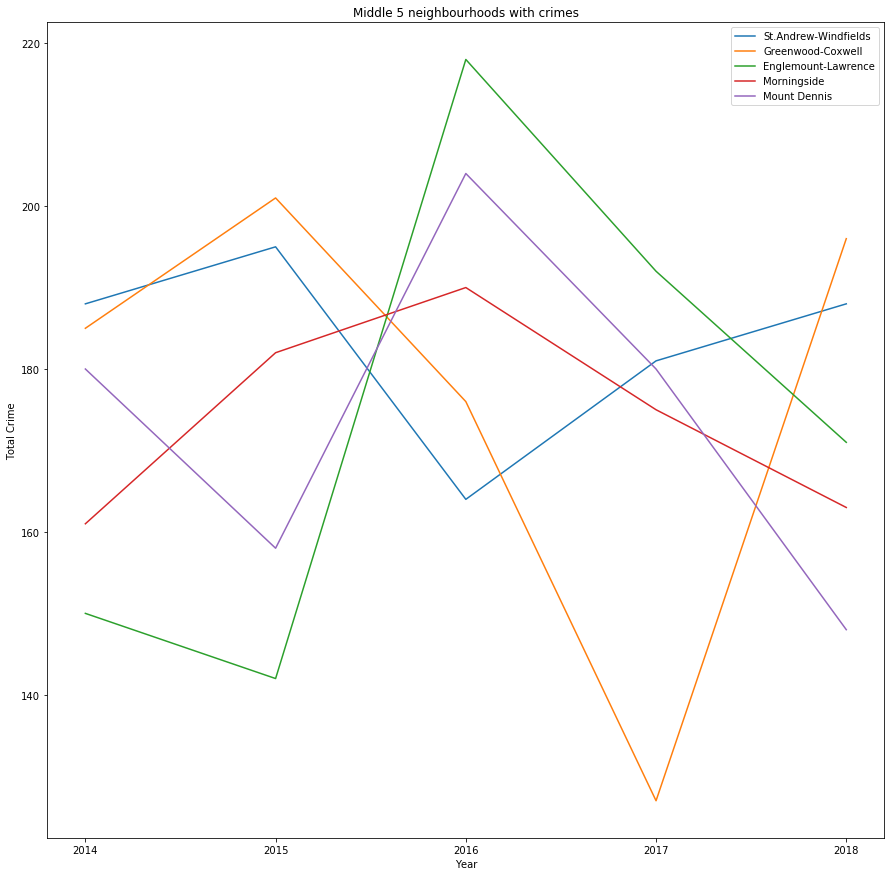

In [29]:
#draw line graph to see trend of safety issues in the different neighbourhoods
# crime trend in mid 5 
fig,ax = plt.subplots()
for hood in Toronto_crimes_midFive:
    #ax.plot(Toronto_crimes.index.get_level_values(1)[i],Toronto_crimes[Toronto_crimes.index.get_level_values(0)==hood].Total,label=hood)
    ax.plot(Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Year,Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Total,label=hood)
    ax.set_xticks(Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Year)

fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_xlabel("Year")
ax.set_ylabel("Total Crime")
ax.set_title("Middle 5 neighbourhoods with crimes")
ax.legend(loc='best')

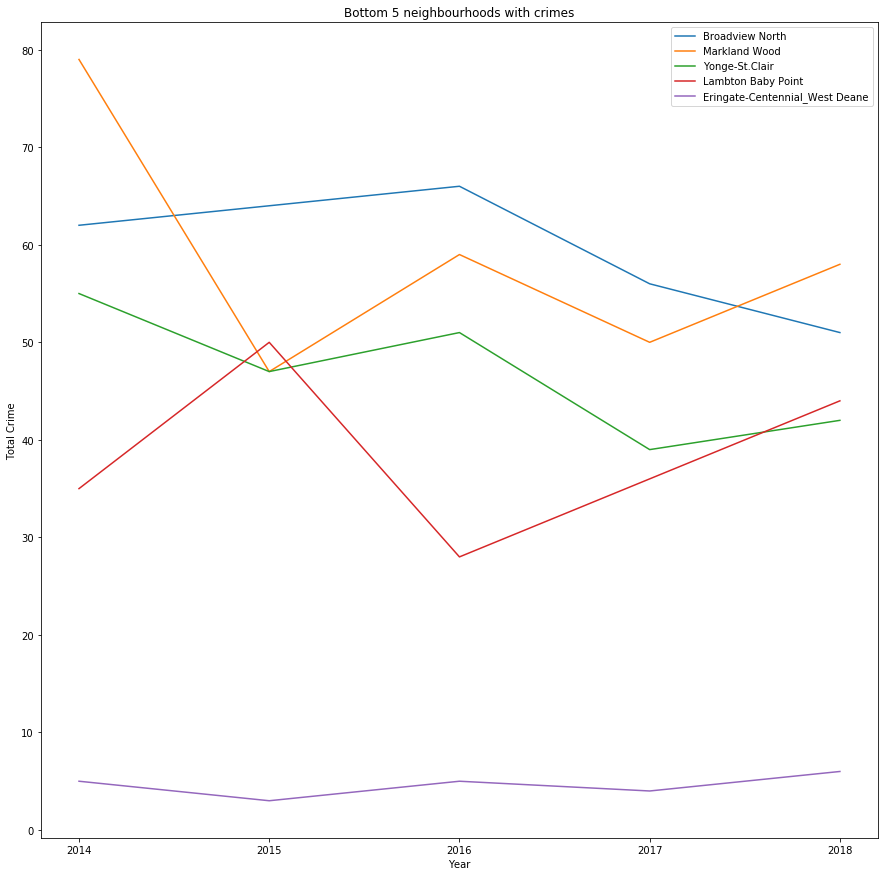

In [30]:
#draw line graph to see trend of safety issues in the different neighbourhoods
# crime trend in bottom 5 neighbourhoods
fig,ax = plt.subplots()
for hood in Toronto_crimes_bottomFive:
    #ax.plot(Toronto_crimes.index.get_level_values(1)[i],Toronto_crimes[Toronto_crimes.index.get_level_values(0)==hood].Total,label=hood)
    ax.plot(Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Year,Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Total,label=hood)
    ax.set_xticks(Toronto_crimes[Toronto_crimes.Neighbourhood==hood].Year)

fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_xlabel("Year")
ax.set_ylabel("Total Crime")
ax.set_title("Bottom 5 neighbourhoods with crimes")
ax.legend(loc='best')

In [31]:
#Sort record by ascending order
Latest_year_records = Toronto_crimes[Toronto_crimes.Year==2018]
#order by total crimes descending
Latest_year_records = Latest_year_records.sort_values(by=["Neighbourhood"], ascending = True)
Latest_year_records.reset_index(inplace = True)
cols = [0]
Latest_year_records.drop(Latest_year_records.columns[cols],axis=1,inplace=True)
Latest_year_records.head(5)

,Neighbourhood,Year,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total
0,Agincourt North,2018,88.0,40.0,71.0,47.0,4.0,250.0
1,Agincourt South-Malvern West,2018,124.0,37.0,93.0,30.0,9.0,293.0
2,Alderwood,2018,30.0,25.0,25.0,8.0,7.0,95.0
3,Annex,2018,295.0,34.0,189.0,54.0,53.0,625.0
4,Banbury-Don Mills,2018,76.0,26.0,83.0,7.0,8.0,200.0


In [32]:
Toronto_crimes_total = Toronto_crimes_total.sort_values(by=["Neighbourhood"], ascending = True)
Toronto_crimes_total.reset_index(inplace = True)
#Toronto_crimes_total['2018 Total'] = Latest_year_records[Latest_year_records.Neighbourhood==Toronto_crimes_total[Toronto_crimes_total.Neighbourhood]].Total
Toronto_crimes_total.head()

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total
0,Agincourt North,392,133,294,162,27,1008
1,Agincourt South-Malvern West,580,159,381,148,63,1331
2,Alderwood,182,84,124,36,34,460
3,Annex,1523,115,782,314,174,2908
4,Banbury-Don Mills,398,84,341,70,45,938


<h2>Comparing 2018 crimes to total crimes across years</h2>

In [33]:
Toronto_crimes_total['2018 Total'] = Latest_year_records.Total.apply(np.int64)
Toronto_crimes_total.rename(columns={'Total': '2014 - 2018 Total'}, inplace=True)
Toronto_crimes_total

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,2014 - 2018 Total,2018 Total
0,Agincourt North,392,133,294,162,27,1008,250
1,Agincourt South-Malvern West,580,159,381,148,63,1331,293
2,Alderwood,182,84,124,36,34,460,95
3,Annex,1523,115,782,314,174,2908,625
4,Banbury-Don Mills,398,84,341,70,45,938,200
...,...,...,...,...,...,...,...,...
136,Wychwood,298,75,168,66,16,623,138
137,Yonge-Eglinton,141,32,95,46,11,325,68
138,Yonge-St.Clair,113,17,81,8,15,234,42
139,York University Heights,1593,493,519,370,166,3141,620


In [34]:
Toronto_crimes_total = Toronto_crimes_total.sort_values(by=["2018 Total"], ascending = False)
Toronto_crimes_total.reset_index(inplace = True)
cols = [0]
Toronto_crimes_total.drop(Toronto_crimes_total.columns[cols],axis=1,inplace=True)
Toronto_crimes_total.head(5)

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,2014 - 2018 Total,2018 Total
0,Church-Yonge Corridor,4061,200,946,904,190,6301,1575
1,Waterfront Communities-The Island,3790,245,1074,323,242,5674,1302
2,West Humber-Clairville,1375,1684,658,376,245,4338,1052
3,Moss Park,2134,119,632,630,94,3609,928
4,Kensington-Chinatown,2013,130,627,367,126,3263,823


<h2>Percentage crime 2018/Total years</h2>

In [36]:
Toronto_crimes_total['2018/Total Crimes %'] = ((Toronto_crimes_total["2018 Total"] / Toronto_crimes_total["2014 - 2018 Total"]) * 100).apply(np.float32).round(decimals=2)
Toronto_crimes_total.head(20)

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,2014 - 2018 Total,2018 Total,2018/Total Crimes %
0,Church-Yonge Corridor,4061,200,946,904,190,6301,1575,25.00
1,Waterfront Communities-The Island,3790,245,1074,323,242,5674,1302,22.95
2,West Humber-Clairville,1375,1684,658,376,245,4338,1052,24.25
3,Moss Park,2134,119,632,630,94,3609,928,25.71
4,Kensington-Chinatown,2013,130,627,367,126,3263,823,25.22
5,Bay Street Corridor,2446,109,538,286,185,3564,820,23.01
6,Downsview-Roding-CFB,1802,449,354,299,70,2974,674,22.66
7,Woburn,1900,220,533,429,76,3158,628,19.89
8,Annex,1523,115,782,314,174,2908,625,21.49
9,York University Heights,1593,493,519,370,166,3141,620,19.74


In [37]:
def drawBarGraph(data):
    ax = data.plot(kind='bar', x='Neighbourhood', y = ['2018 Total','2014 - 2018 Total'], title ="2018 crime vs 2014 - 2018 crime", figsize=(15, 15), legend=True, fontsize=12)
    ax.set_xlabel("Neighbourhood", fontsize=12)
    ax.set_ylabel("Crime Count", fontsize=12)
    plt.show()

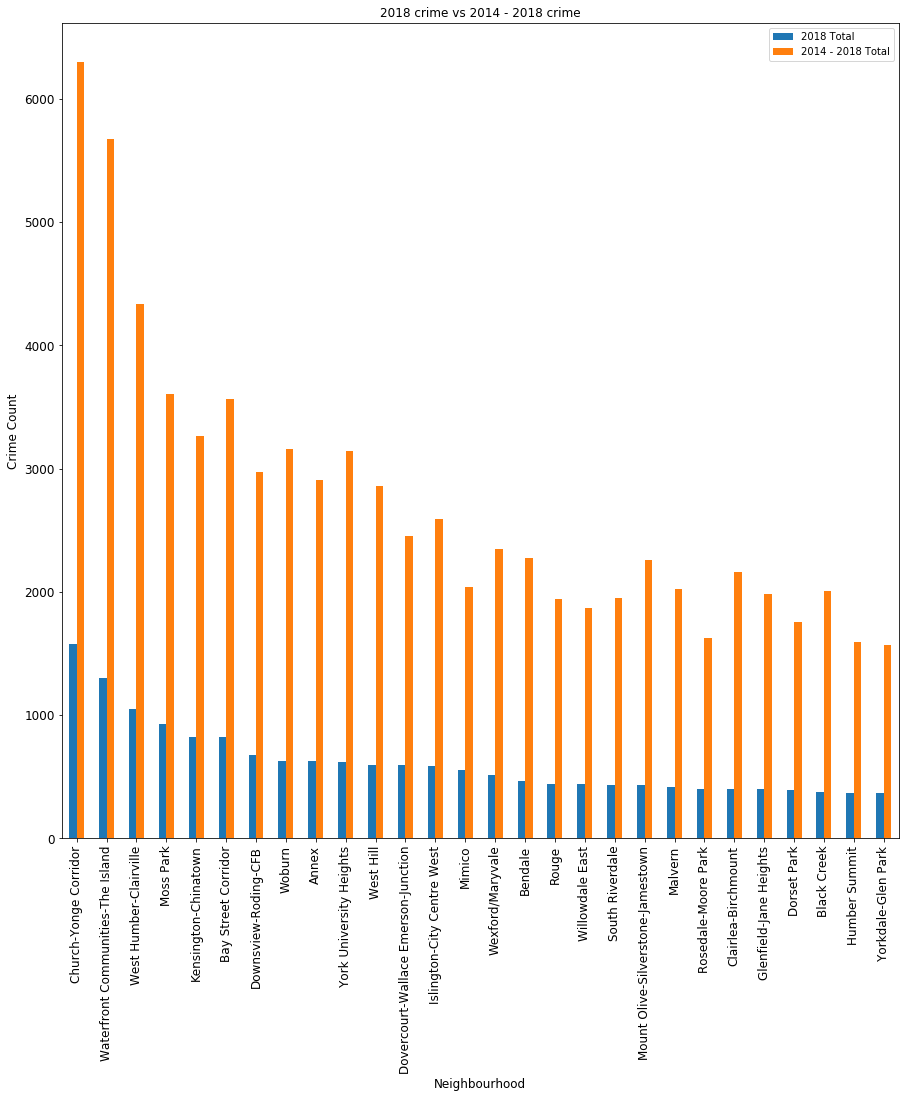

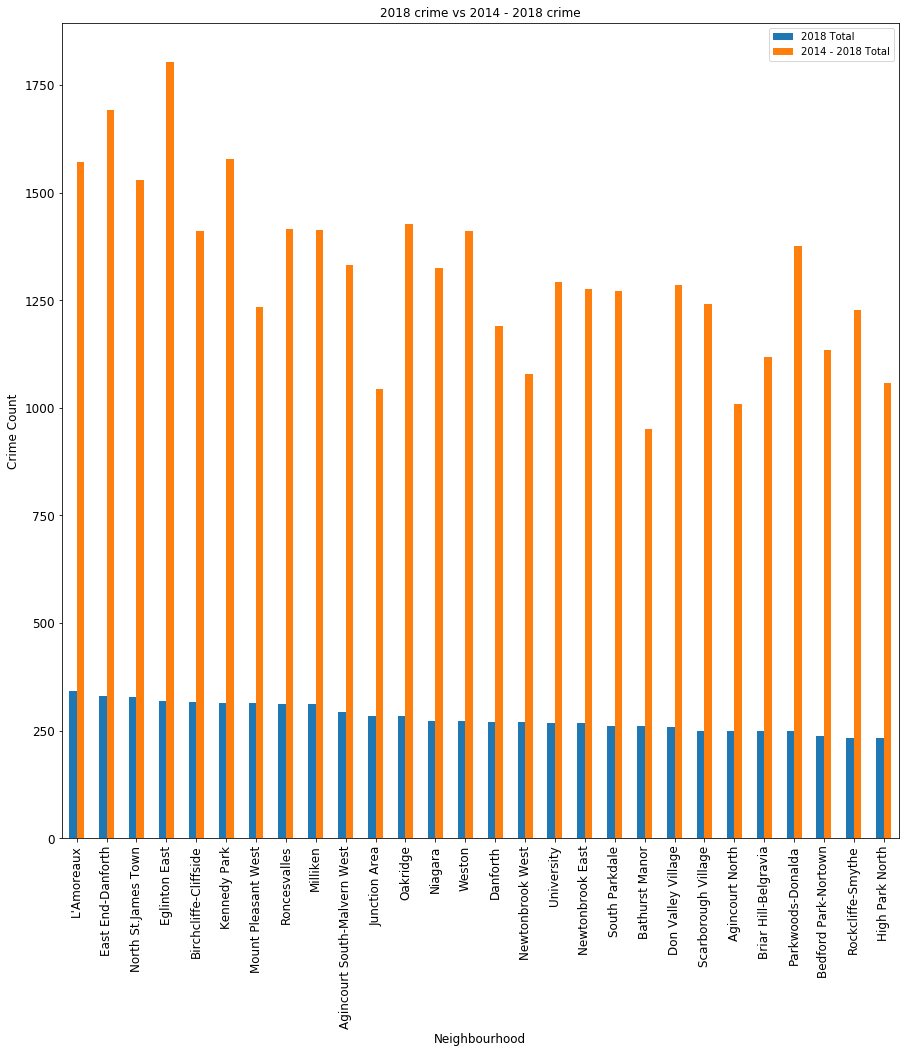

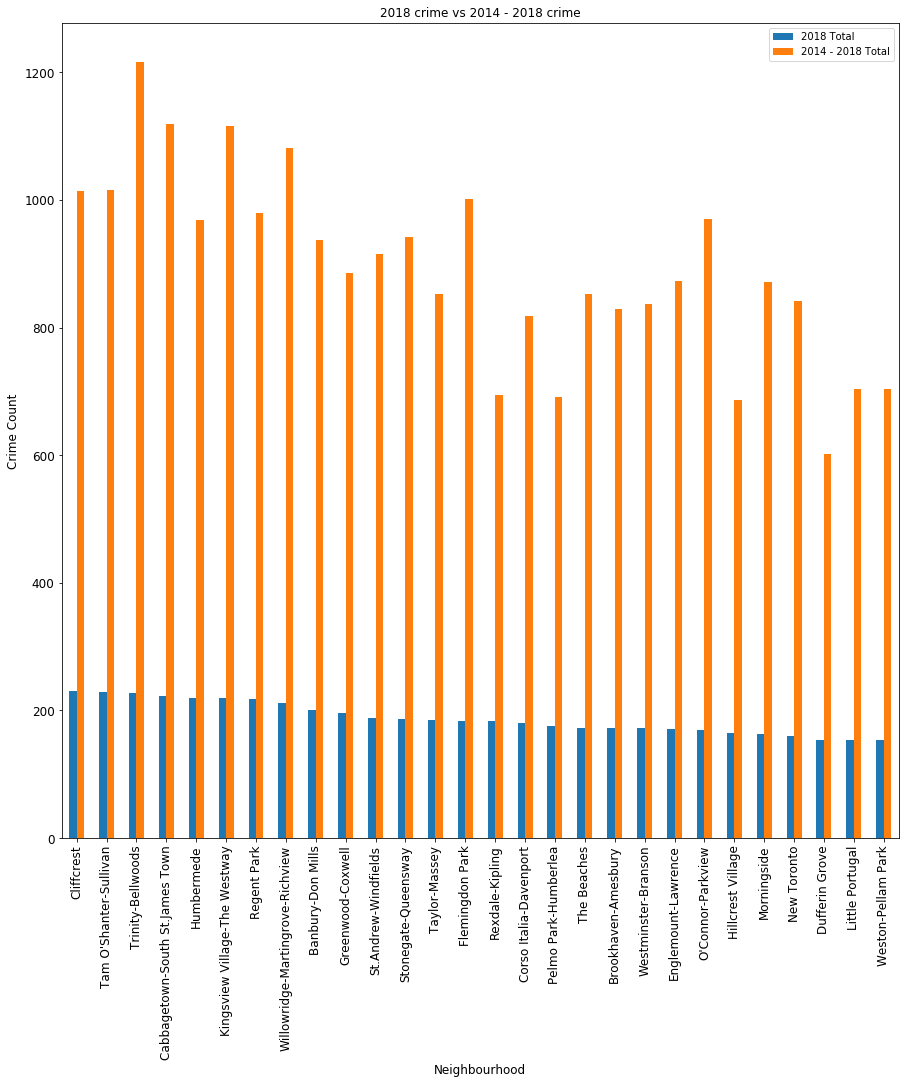

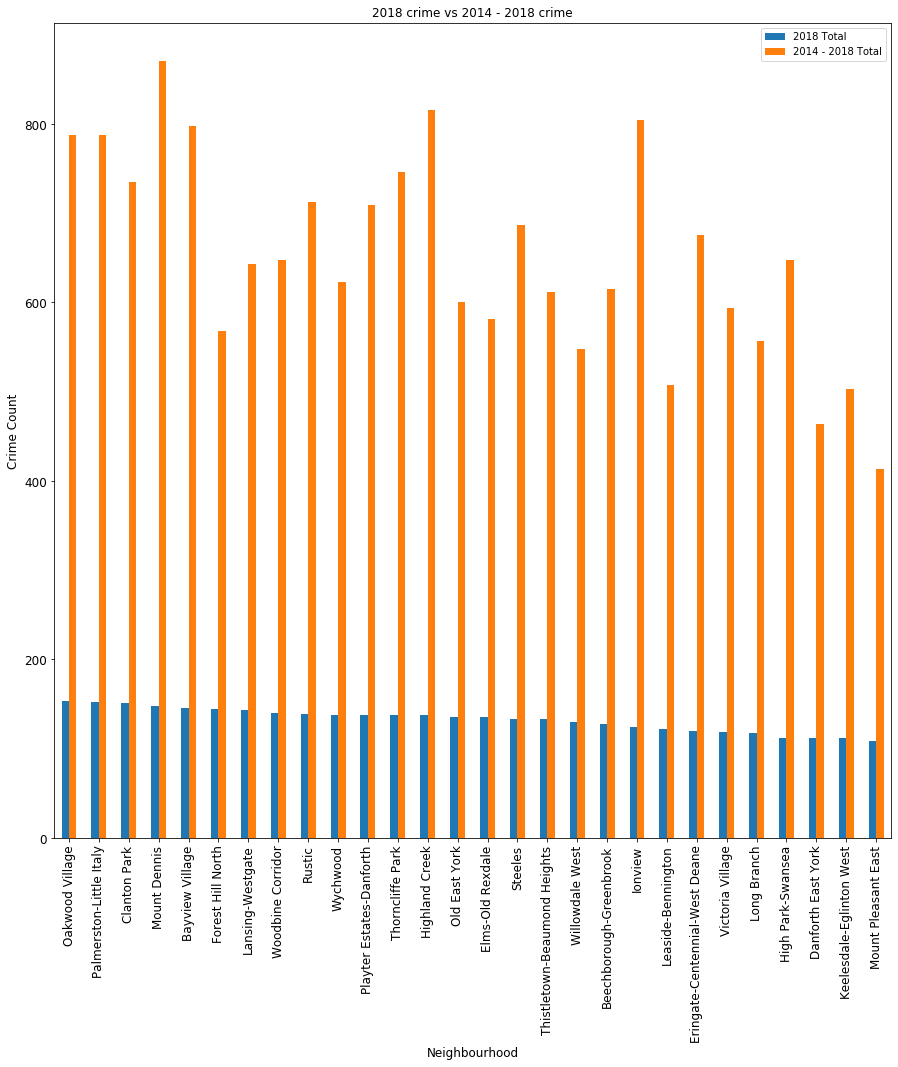

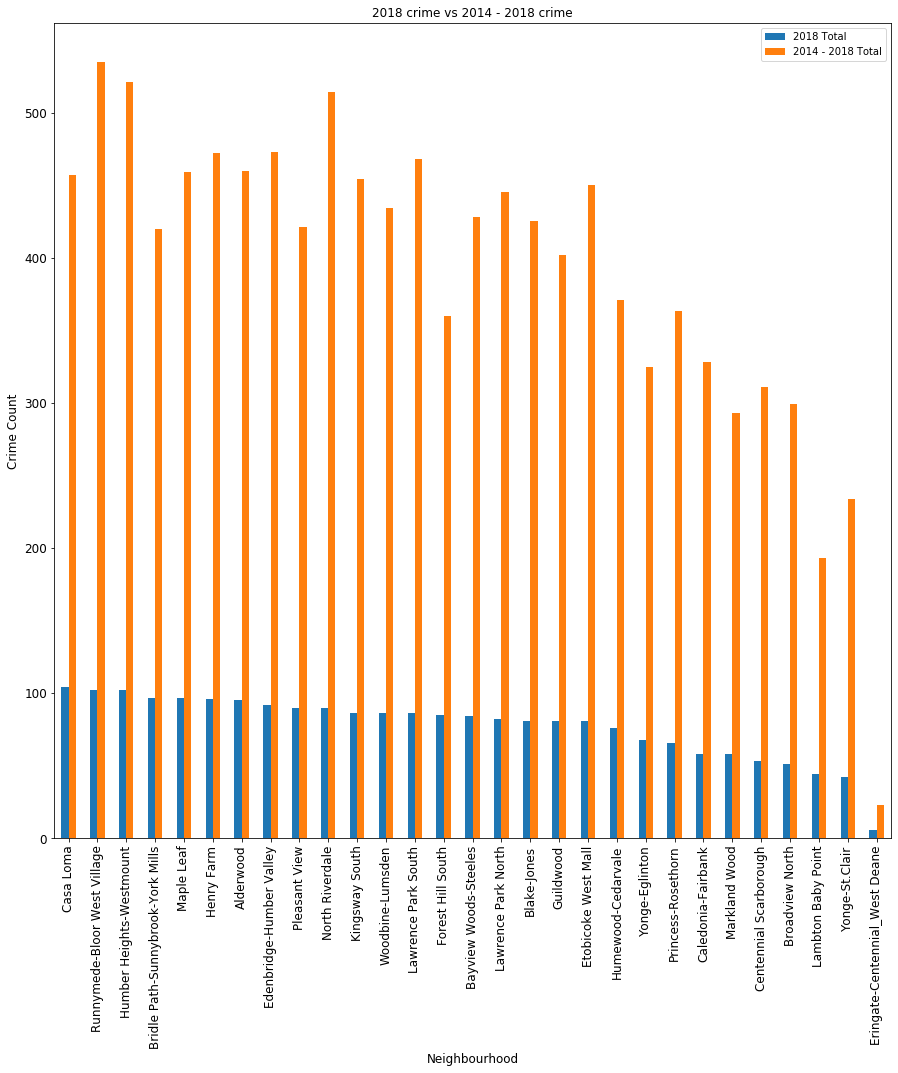

In [38]:
'''
Toronto_crimes_total[0:28]
Toronto_crimes_total[28:56]
Toronto_crimes_total[56:84]
Toronto_crimes_total[84:112]
Toronto_crimes_total[112:]
'''
#grapth comparing total crime with 2018 crime for all neighbourhoods
drawBarGraph(Toronto_crimes_total[0:28])
drawBarGraph(Toronto_crimes_total[28:56])
drawBarGraph(Toronto_crimes_total[56:84])
drawBarGraph(Toronto_crimes_total[84:112])
drawBarGraph(Toronto_crimes_total[112:])

In [39]:
#import library for geolocation
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

     |████████████████████████████████| 102kB 16.2MB/s ta 0:00:01


<h2>Importing library to view neighbourhoods on map</h2>

In [40]:
#get approx lat and long from original data 
result_df = df.drop_duplicates(subset=['Neighbourhood'], keep='first')
result_df["Neighbourhood"] = result_df["Neighbourhood"].apply(lambda x: x.split('(')[0].strip())
result_df = result_df[["Neighbourhood","Lat","Long"]]
result_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighbourhood,Lat,Long
0,Bay Street Corridor,43.659229,-79.385193
1,Newtonbrook West,43.777592,-79.425400
3,Malvern,43.801727,-79.210373
4,Milliken,43.835884,-79.254334
5,Clairlea-Birchmount,43.709972,-79.273819


In [41]:
Toronto_crimes_total = pd.merge(Toronto_crimes_total, result_df, on='Neighbourhood')
Toronto_crimes_total.head(20)

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,2014 - 2018 Total,2018 Total,2018/Total Crimes %,Lat,Long
0,Church-Yonge Corridor,4061,200,946,904,190,6301,1575,25.00,43.649132,-79.372192
1,Waterfront Communities-The Island,3790,245,1074,323,242,5674,1302,22.95,43.638840,-79.400650
2,West Humber-Clairville,1375,1684,658,376,245,4338,1052,24.25,43.732254,-79.618439
3,Moss Park,2134,119,632,630,94,3609,928,25.71,43.653381,-79.369148
4,Kensington-Chinatown,2013,130,627,367,126,3263,823,25.22,43.650673,-79.387512
5,Bay Street Corridor,2446,109,538,286,185,3564,820,23.01,43.659229,-79.385193
6,Downsview-Roding-CFB,1802,449,354,299,70,2974,674,22.66,43.737373,-79.490776
7,Woburn,1900,220,533,429,76,3158,628,19.89,43.779549,-79.232979
8,Annex,1523,115,782,314,174,2908,625,21.49,43.668114,-79.412384
9,York University Heights,1593,493,519,370,166,3141,620,19.74,43.743652,-79.491852


In [42]:
import folium
from folium.features import DivIcon
# create empty map zoomed in on Toronto
TO_COORDINATES = (43.7184038, -79.518142)
mapper = folium.Map(location=TO_COORDINATES, zoom_start=12)

for each in Toronto_crimes_total.iterrows():
    folium.Marker(
        location = [each[1]['Lat'],each[1]['Long']]).add_to(mapper)
display(mapper)

<h2>Top 10 cities with most crime in red circles and bottom 10 in green</h2>

In [61]:
# create empty map zoomed in on Toronto
TO_COORDINATES = (43.7184038, -79.518142)
mapper = folium.Map(location=TO_COORDINATES, zoom_start=12)

for index, each in Toronto_crimes_total.iterrows():
    label = '{}: {}'.format(each['Neighbourhood'], each['2014 - 2018 Total'])
    label = folium.Popup(label, parse_html=True)
    colorCircle = 'blue'
    if index < 11:
        colorCircle = 'red'
    if index > 131:
        colorCircle = 'green'
    folium.CircleMarker(
        [each['Lat'], each['Long']],
        #radius=(each[1]['2014 - 2018 Total']/100),
        radius=10,
        popup=label,
        color=colorCircle,
        fill=True,
        fill_color=colorCircle,
        fill_opacity=0.7,
        parse_html=False).add_to(mapper) 
display(mapper)

In [44]:
Toronto_crimes_percentage = Toronto_crimes_total.sort_values(by=["2018/Total Crimes %"], ascending = False)
#Toronto_crimes_total.reset_index(inplace = True)
Toronto_crimes_percentage.head()

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,2014 - 2018 Total,2018 Total,2018/Total Crimes %,Lat,Long
47,Bathurst Manor,417,174,240,69,51,951,261,27.44,43.755123,-79.440536
38,Junction Area,554,139,228,96,26,1043,285,27.33,43.665417,-79.463265
13,Mimico,1435,162,280,95,68,2040,557,27.30,43.615738,-79.488228
111,Mount Pleasant East,188,53,127,26,19,413,109,26.39,43.708656,-79.388878
70,Rexdale-Kipling,358,137,90,100,9,694,183,26.37,43.725983,-79.565254


In [45]:
Toronto_crimes_percentage.tail()

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,2014 - 2018 Total,2018 Total,2018/Total Crimes %,Lat,Long
137,Broadview North,180,20,70,24,5,299,51,17.06,43.685982,-79.356293
136,Centennial Scarborough,185,27,67,25,7,311,53,17.04,43.777874,-79.146729
87,Mount Dennis,514,98,119,130,9,870,148,17.01,43.688660,-79.494217
96,Highland Creek,435,95,172,98,16,816,138,16.91,43.785347,-79.193344
103,Ionview,512,47,153,77,15,804,124,15.42,43.729965,-79.277862


<h2>Getting average values of data</h2>

In [48]:
l = Toronto_crimes_percentage["2018/Total Crimes %"]
average_percentage = sum(l) / float(len(l))
average_percentage

21.190567375886527

In [49]:
def getAverage(col):
    l = Toronto_crimes_total[col]
    average_percentage = sum(l) / float(len(l))
    return average_percentage

In [54]:
Assault_average = getAverage("Assault")
print("Assault average: {}".format(Assault_average))
Auto_Theft_average = getAverage("Auto Theft")
print("Auto Theft average: {}".format(Auto_Theft_average))
Break_Enter_average = getAverage("Break and Enter")
print("Break and Enter average: {}".format(Break_Enter_average))
Robbery_average = getAverage("Robbery")
print("Robbery average: {}".format(Robbery_average))
Theft_Over_average = getAverage("Theft Over")
print("Theft Over average: {}".format(Theft_Over_average))

Assault average: 644.5248226950355
Auto Theft average: 128.92198581560282
Break and Enter average: 247.59574468085106
Robbery average: 128.56737588652481
Theft Over average: 38.51063829787234


In [55]:
#Top 5 dangerous neighbourhoods based on total crimes
Toronto_crimes_total.head(5)

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,2014 - 2018 Total,2018 Total,2018/Total Crimes %,Lat,Long
0,Church-Yonge Corridor,4061,200,946,904,190,6301,1575,25.00,43.649132,-79.372192
1,Waterfront Communities-The Island,3790,245,1074,323,242,5674,1302,22.95,43.638840,-79.400650
2,West Humber-Clairville,1375,1684,658,376,245,4338,1052,24.25,43.732254,-79.618439
3,Moss Park,2134,119,632,630,94,3609,928,25.71,43.653381,-79.369148
4,Kensington-Chinatown,2013,130,627,367,126,3263,823,25.22,43.650673,-79.387512


In [56]:
#Bottom 5 dangerous neighbourhoods based on total crimes
Toronto_crimes_total.tail(5)

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,2014 - 2018 Total,2018 Total,2018/Total Crimes %,Lat,Long
136,Centennial Scarborough,185,27,67,25,7,311,53,17.04,43.777874,-79.146729
137,Broadview North,180,20,70,24,5,299,51,17.06,43.685982,-79.356293
138,Lambton Baby Point,98,34,46,10,5,193,44,22.80,43.663891,-79.503487
139,Yonge-St.Clair,113,17,81,8,15,234,42,17.95,43.696976,-79.404060
140,Eringate-Centennial_West Deane,4,4,9,3,3,23,6,26.09,43.651577,-79.603096
